In [1]:
import ROOT
from math import exp as exp
from math import sqrt as sqrt
canvas = ROOT.TCanvas()

Welcome to JupyROOT 6.18/04


In [2]:
def f(x,p):
    return p[0]*(exp(x[0]+x[1])/(1 + (x[1]*sqrt(x[0]))/2))
    #x=x[0],y=x[1]

xa = 0
xb = 0.5
ya = 1
yb = 3

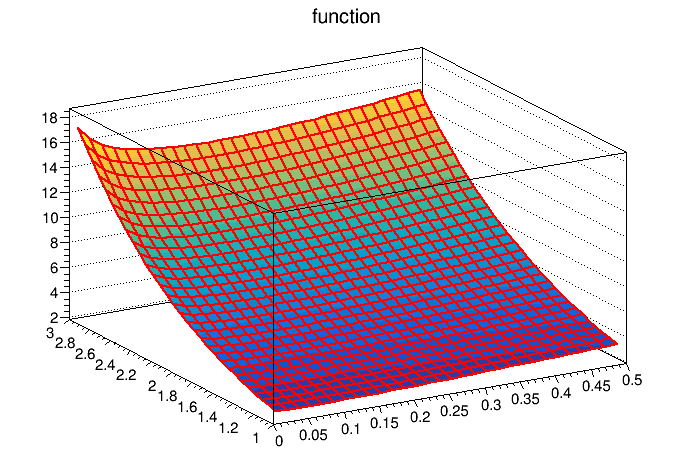

In [3]:
function = ROOT.TF2("function", f, xa, xb, ya, yb, 1)
function.SetParameter(0,1)
function.Draw("surf1")
canvas.Draw()

# Метод среднего

In [4]:
s = 0 
s1 = 0 

number = 1000

for i in range (1, 11):
    
    si = 0 
    si1 = 0 
    
    for j in range (0, number):
        
        xj = ROOT.gRandom.Uniform(xa, xb)
        yj = ROOT.gRandom.Uniform(ya, yb)
        fj = function(xj, yj)
        
        si = si + fj*(xb-xa)*(yb-ya)
        si1 = si1 + (fj*(xb-xa)*(yb-ya))**2
    
    s = s + si
    s1 = s1 + si1
    
    Mi = si/number
    M = s/(i*number) 
    
    
    Di = si1/number - (Mi)**2
    sigmai = sqrt(Di/number) 
    
    D = s1/(i*number) - (M)**2
    sigma = sqrt(D/(i*number))
    
    
    print(i*1000, "M:", Mi, "; sigma:", sigmai)
    print("   M for", i, "iterations:", M, "; sigma:", sigma, "\n")

1000 M: 7.221047468088693 ; sigma: 0.10918827103167467
   M for 1 iterations: 7.221047468088693 ; sigma: 0.10918827103167467 

2000 M: 7.45825654193301 ; sigma: 0.11257442332408017
   M for 2 iterations: 7.339652005010852 ; sigma: 0.07845892777433408 

3000 M: 7.355151922959964 ; sigma: 0.11300369671690608
   M for 3 iterations: 7.344818644327223 ; sigma: 0.0644577458724793 

4000 M: 7.178666002095713 ; sigma: 0.1082720632352677
   M for 4 iterations: 7.3032804837693455 ; sigma: 0.05541702904413851 

5000 M: 7.412321431574158 ; sigma: 0.10930644222393471
   M for 5 iterations: 7.325088673330308 ; sigma: 0.04943446732131546 

6000 M: 7.327274899512412 ; sigma: 0.11338283851447281
   M for 6 iterations: 7.325453044360659 ; sigma: 0.045322865224024025 

7000 M: 7.16334851705624 ; sigma: 0.11219209977977973
   M for 7 iterations: 7.302295254745742 ; sigma: 0.04202997647072892 

8000 M: 7.322070726753131 ; sigma: 0.10949267423506644
   M for 8 iterations: 7.304767188746665 ; sigma: 0.039240

# Выделение главной части

In [5]:
from cmath import sqrt as csqrt

In [6]:
# константа в аналитической части
C = 16/19

In [7]:
# Аналитически вычисленный интеграл
def f1_AnInt(xa, xb, ya,yb):
    return C*(((1+xb)**2-(1+xa)**2)/2*(exp(yb)-exp(ya)))  

In [8]:
# вторая часть
def f2(x, p):
    return p[0]*((exp(x[0]+x[1])/(1 + x[1]*sqrt(x[0])/2))-C*exp(x[1])*(1+x[0]))

In [9]:
f1_AnInt(xb,xa,yb,ya)

9.140660576172959

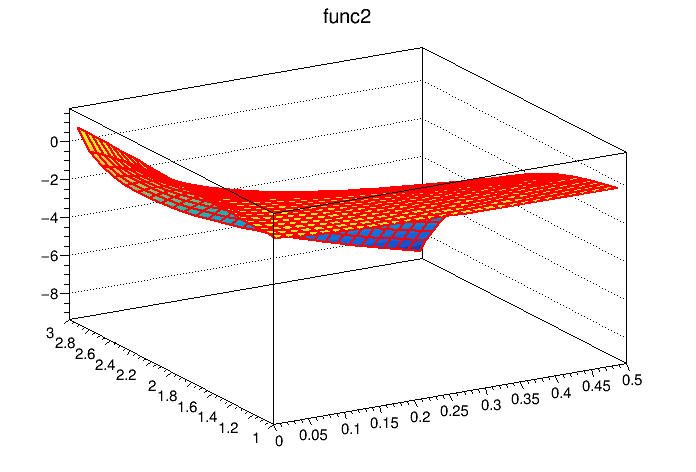

In [10]:
func2 = ROOT.TF2("func2", f2, xa, xb, ya, yb, 1)

func2.SetParameter(0,1)

func2.Draw("surf1")
canvas.Draw()

In [11]:
f2s = 0 
f2s1 = 0 

number = 1000

for i in range (1, 11):
    
    f2si = 0 
    f2si1 = 0 
    
    for j in range (0, number):
        
        xj = ROOT.gRandom.Uniform(xa, xb)
        yj = ROOT.gRandom.Uniform(ya, yb)
        fj = func2(xj, yj)
        
        f2si = f2si + fj*(xb-xa)*(yb-ya)
        f2si1 = f2si1 + (fj*(xb-xa)*(yb-ya))**2
    
    f2s = f2s + f2si
    f2s1 = f2s1 + f2si1
    
    f2Mi = f2si/number
    f2M = f2s/(i*number) 
    
    resi = (f2Mi + f1_AnInt(xb,xa,yb,ya))
    res = (f2M + f1_AnInt(xb,xa,yb,ya))
    
    #resi = (f2Mi + AnInt)/2
    #res = (f2M + AnInt)/2
    
    
    f2Di = f2si1/number - (f2Mi)**2
    f2sigmai = sqrt(f2Di/number) 
    
    f2D = f2s1/(number*i) - (f2M)**2
    f2sigma = sqrt(f2D/(i*number))
    
    
    print(i*1000, "M:", resi, "; sigma:", f2sigmai)
    print("   M for", i, "iterations:", res, "; sigma:", f2sigma, "\n")

1000 M: 7.415829165587528 ; sigma: 0.06094370042856673
   M for 1 iterations: 7.415829165587528 ; sigma: 0.06094370042856673 

2000 M: 7.379020521557591 ; sigma: 0.0623100525537213
   M for 2 iterations: 7.397424843572559 ; sigma: 0.0435814028838909 

3000 M: 7.301334449463366 ; sigma: 0.0631196299317509
   M for 3 iterations: 7.3653947122028285 ; sigma: 0.03588190191900618 

4000 M: 7.288780990184254 ; sigma: 0.06459163030971281
   M for 4 iterations: 7.346241281698184 ; sigma: 0.031388770803420264 

5000 M: 7.336779493492366 ; sigma: 0.06301138762426264
   M for 5 iterations: 7.344348924057021 ; sigma: 0.028095968046307495 

6000 M: 7.351588255270315 ; sigma: 0.06348779494379293
   M for 6 iterations: 7.345555479259236 ; sigma: 0.025693346140136422 

7000 M: 7.212471496193802 ; sigma: 0.06351928848628546
   M for 7 iterations: 7.32654348167846 ; sigma: 0.023825560984703526 

8000 M: 7.372612398461053 ; sigma: 0.06251708826948711
   M for 8 iterations: 7.332302096276284 ; sigma: 0.022